.mp3 - lossy compression
.wav - uncompressed
.flac - lossless compression

In [2]:
import wave

Why are we gonna use Wave? </br>
- It's the simplest format to work with
- It's uncompressed
- It's the basis for other formats
- Python has a built-in library to work with it

In [3]:
obj = wave.open('recorded_audio.wav', 'rb')

Audio signal parameters:
- Sampling rate: Number of samples per second. Measured in Hz. Common values: 8kHz, 16kHz, 44.1kHz, 48kHz
- Bit depth(sample width): Number of bits per sample. Measured in bits. Common values: 8 bits, 16 bits, 24 bits, 32 bits
- Number of channels: Mono (1 channel), Stereo (2 channels)

Sampling rate and bit depth determine the quality of the audio signal. The higher the sampling rate and bit depth, the better the quality.

In [4]:
print ("Channels", obj.getnchannels())
print ("Bit depth", obj.getsampwidth())
print ("frame rate", obj.getframerate())
print ("Number of frames",obj.getnframes())
print ("parameters" , obj.getparams())

Channels 2
Bit depth 2
frame rate 41000
Number of frames 360448
parameters _wave_params(nchannels=2, sampwidth=2, framerate=41000, nframes=360448, comptype='NONE', compname='not compressed')


# Everything is simple math:
frames = samples * channels

So if you have a 16 bit audio file with a sampling rate of 44.1kHz and a duration of 10 seconds, you will have:
frames = 16 * 44100 * 10 = 7056000

similarly...

In [6]:
# How long my audio is
t_audio = obj.getnframes() / obj.getframerate()
print(t_audio)

8.791414634146342


In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
obj = wave.open("recorded_audio.wav", "rb" )
sample_freq =  obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)
obj.close()

t_audio = n_samples / sample_freq

In [9]:
if obj.getnchannels() == 2:
    signal_array = np.frombuffer(signal_wave, dtype=np.int16)[::2]
else:
    signal_array = np.frombuffer(signal_wave, dtype=np.int16)

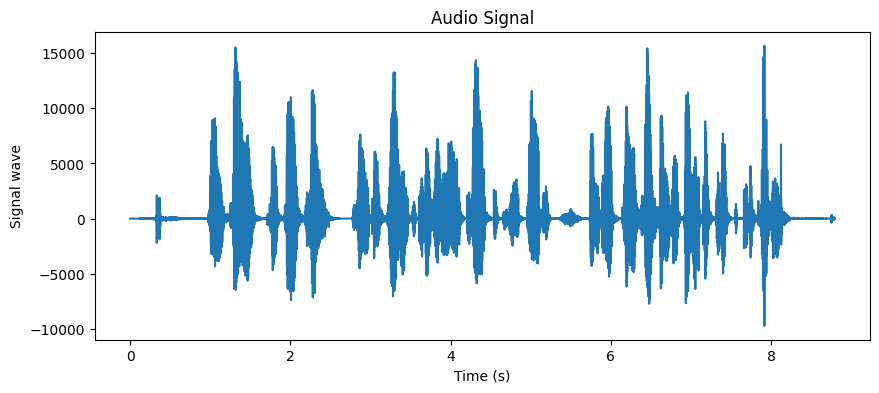

In [10]:
times = np.linspace(0, t_audio, num=n_samples)


plt.figure(figsize=(10, 4))
plt.plot(times, signal_array)
plt.title("Audio Signal")
plt.ylabel("Signal wave")
plt.xlabel("Time (s)")
plt.show()

# Creating a "new" audio file
- We can create a new audio file by using the wave library
- For that, we need to specify the parameters of the audio file
- However, we can't just create a new audio file and start writing samples to it
- We need to create a new audio file, write the parameters to it, and then write the samples to it

In [11]:
obj_new = wave.open("recorded_audio2.wav", "wb") # Create a new wave file
obj_new.setnchannels(1) # Set number of channels
obj_new.setsampwidth(2) # Set sample width
obj_new.setframerate(44100) # Set frame rate
obj_new.writeframes(signal_wave) # Write the audio frames to file
obj_new.close() # Close the file

# PyAudio
- PyAudio is a cross-platform audio I/O library for Python
- It allows you to easily use Python to play and record audio on a variety of platforms


In [14]:
import pyaudio

frames_per_buffer = 3200

format_var = pyaudio.paInt16
channels_var = 1
rate_var = 44100
p = pyaudio.PyAudio()

Buffer: Each frame contains a certain number of samples, and a buffer is a block of memory for temporarily storing audio data. The larger the buffer, the less likely it is that there will be a dropout (a gap in the recording due to data not being ready in time), but it also introduces more latency.

In [15]:
stream = p.open(format=format_var, channels=channels_var, rate=rate_var, input=True,  frames_per_buffer=frames_per_buffer) #This opens an audio stream. 
print("recording...")
frames = []
for i in range(0, int(rate_var / format_var * 5)):
    data = stream.read(format_var)
    frames.append(data) # Stops the recording after 5 seconds. 
print("finished recording")
stream.stop_stream()
stream.close()
p.terminate()


recording...
finished recording


In [16]:
print(len(frames))

27562


In [17]:
obj = wave.open("new_recording.wav", "wb")
obj.setnchannels(channels_var)
obj.setsampwidth(p.get_sample_size(format_var))
obj.setframerate(rate_var)
obj.writeframes(b''.join(frames))
obj.close()

Size|	Parameters|	English-only model|	Multilingual model </br>
---|---|---|---|
tiny|	39 M|	✓|	✓</br>
base|	74 M|	✓|	✓</br>
small|	244 M|	✓|	✓</br>
medium|	769 M|	✓|	✓</br>
large|	1550 M|	|	✓</br>

In [18]:
import whisper

model = whisper.load_model("base")

In [19]:
result = model.transcribe("recorded_audio.wav")
print(result["text"])

d:\AuriMain\Documents\Code\Learn\UPY Generative AI Course\.venv\Lib\site-packages\whisper\transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 And then the day came when the risk to remain tight in the bud was more painful than the risk it took to blossom.
